In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy as sp
import warnings
import datetime
warnings.filterwarnings("ignore")
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/My Drive/supermarket_sales.csv')

In [6]:
df.head(15)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9


In [7]:
import pandas as pd

drive.mount('/content/drive')

file_path = '/content/drive/My Drive/supermarket_sales.csv'

df = pd.read_csv(file_path)

print(df.head())

missing_values = df.isnull().sum()
print(f"Missing values:\n{missing_values}")
df_cleaned = df.dropna()

print(df_cleaned.describe())

df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])

duplicates = df_cleaned.duplicated().sum()
df_cleaned = df_cleaned.drop_duplicates()
print(f"Duplicate rows: {duplicates}")
print(df_cleaned.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gros

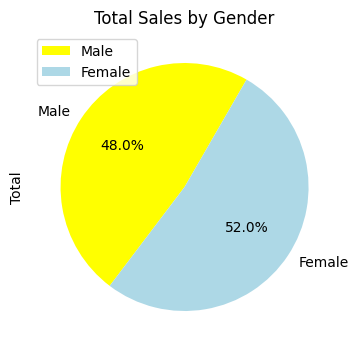

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

Gender = df.groupby('Gender')['Total'].sum().sort_values()

plt.figure(figsize=(4,6))
Gender.plot(kind='pie', autopct='%1.1f%%', colors=['yellow', 'lightblue'], startangle=60, legend=True)
plt.title('Total Sales by Gender')
plt.show()

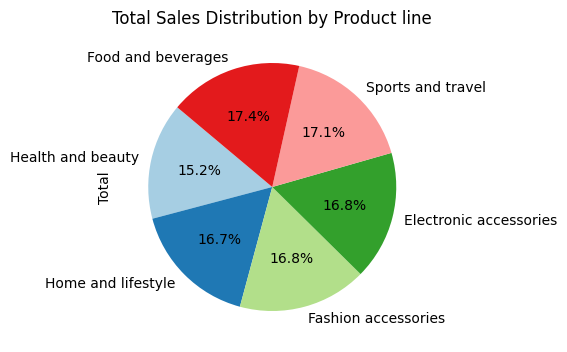

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

city_sales = df.groupby('Product line')['Total'].sum().sort_values()

plt.figure(figsize=(4,6))
city_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Total Sales Distribution by Product line')
plt.show()

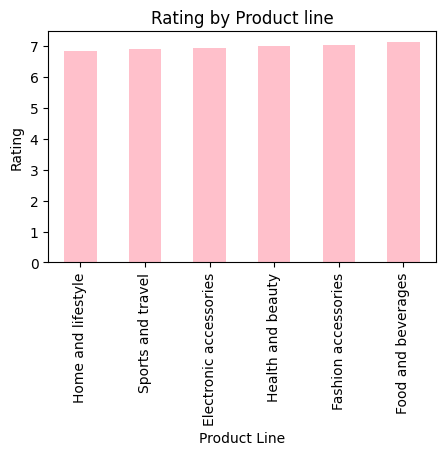

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(5,3))
rating = df.groupby('Product line')['Rating'].mean().sort_values()
rating.plot(kind='bar', color='pink')
plt.title('Rating by Product line')
plt.xlabel('Product Line')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.show()

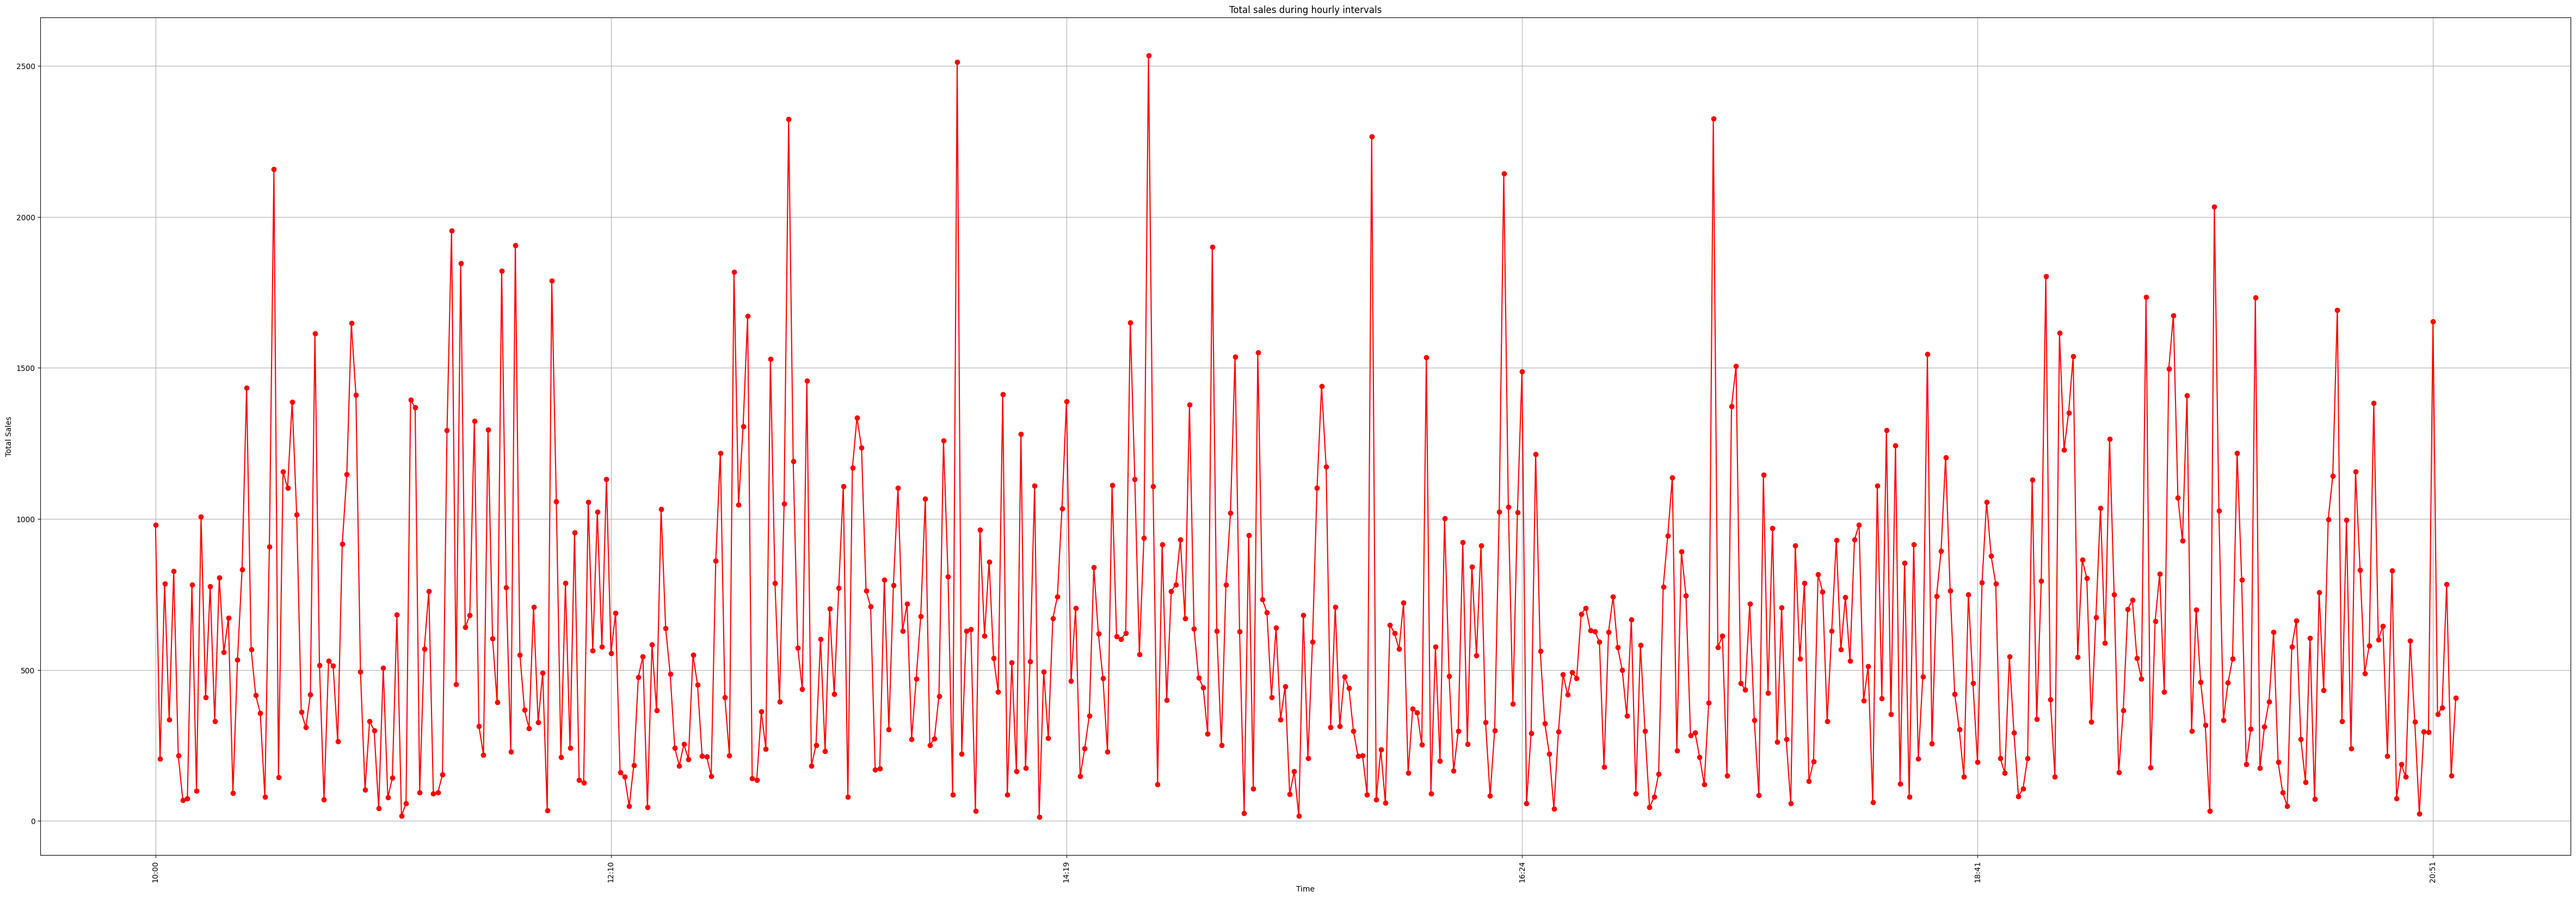

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(60,20))
time_sale = df.groupby('Time')['Total'].sum()
time_sale.plot(kind = 'line', marker = 'o' , linestyle = '-' , color = 'red')
plt.title('Total sales during hourly intervals')
plt.xlabel('Time')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

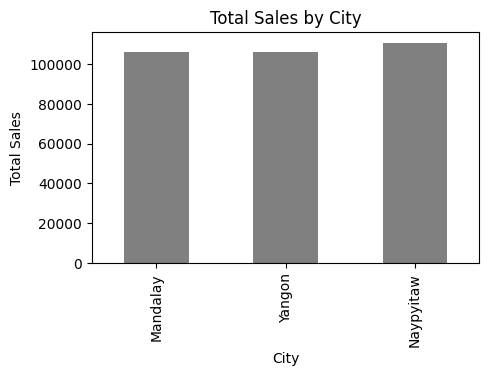

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(5,3))
city_sales = df.groupby('City')['Total'].sum().sort_values()
city_sales.plot(kind='bar', color='gray')
plt.title('Total Sales by City')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

data = pd.read_csv('/content/drive/My Drive/supermarket_sales.csv')

features = ['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Product line',
            'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time',
            'Payment', 'cogs', 'gross margin percentage', 'Rating']

X = data[features]
y = data['gross income']

label_encoders = {}
for column in ['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Product line',
               'Date', 'Time', 'Payment']:
    label_encoders[column] = LabelEncoder()
    X[column] = label_encoders[column].fit_transform(X[column])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

example = X_test.iloc[0].values.reshape(1, -1)
predicted_sales = model.predict(example)
print(f'Predicted Sales: {predicted_sales[0]}')

Mean Squared Error: 0.003934815100750175
Predicted Sales: 24.86248999999999
